# WeatherPy
----
Bryan Paynich

1/15/2019

### Analysis
* As you move up in latitude the temperature appears to gradually trend colder.  This would make sense as you move towards the north pole.
* Humidity gradiants are pretty consistant across the latitudes.  Most of the cities are showing a humidity rating above 50%.
* Cloudiness has two large clusters across the latitudes.  These clusters indicate clear skies on versus mostly cloudy.  It would be interesting to understand the method for determining percentage of cloudiness and how this is reported.  It seems like this measurement could be very subjectivly reported.
* There doesn't seem to be a lot of connection between wind speed vs. latitude.  There are a few locations with some gusting winds but most locations are pretty calm below 3 mph.


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

582

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Connection information for OpenWeatherMap Site
url = "http://api.openweathermap.org/data/2.5/weather?q="

#Initalize lists 
cityname   = []
cloudiness = []
country    = []
date       = []
humidity   = []
lat        = []
lon        = []
max_temp   = []
wind_speed = []
count = 1
total_cities = len(cities)

# Loop through each city an extract weather data per city
for cit in cities:
    response = requests.get(url + cit + "&appid=" + api_key + "&units=metric")
    data = response.json()
    
    # Skip city if not found on Site
    if(data['cod'] == '404'):
        print ("The city of " + cit + " was not found in API database. Skipping...")
        continue
        
    cityname.append(data['name'])
    print("Processing City: " + data['name'] + ", " + data['sys']['country'] + " ... " + str(count) + " of " + str(total_cities) )
    count = count + 1
    cloudiness.append(data['clouds']['all'])
    country.append(data['sys']['country'])
    date.append(data['dt'])
    humidity.append(data['main']['humidity'])
    lat.append(data['coord']['lat'])
    lon.append(data['coord']['lon'])
    max_temp.append(data['main']['temp_max'])
    wind_speed.append(data['wind']['speed'])
    
# Combine data and create weather_data dataframe
print ("Processing complete...")
weather_data = list(zip(cityname, cloudiness, country, date, humidity, lat, lon, max_temp, wind_speed))
df = pd.DataFrame(weather_data)
df.columns = ["Cityname", "Cloudiness", "Country","Date", "Humidity", "Lat", "Lon", "Max Temp", "Wind Speed"]

Processing City: Belaya Gora, RU ... 1 of 582
Processing City: Bredasdorp, ZA ... 2 of 582
The city of barentsburg was not found in API database. Skipping...
Processing City: Vaini, IN ... 3 of 582
Processing City: Ayagoz, KZ ... 4 of 582
Processing City: Georgetown, GY ... 5 of 582
Processing City: Cape Town, ZA ... 6 of 582
Processing City: Hithadhoo, MV ... 7 of 582
The city of stornoway was not found in API database. Skipping...
Processing City: Komsomolskiy, RU ... 8 of 582
Processing City: Phitsanulok, TH ... 9 of 582
Processing City: Aksu, KZ ... 10 of 582
Processing City: Lebu, ET ... 11 of 582
Processing City: Arraial do Cabo, BR ... 12 of 582
Processing City: Hobart, AU ... 13 of 582
Processing City: Hilo, US ... 14 of 582
Processing City: Mataura, NZ ... 15 of 582
Processing City: Bluff, AU ... 16 of 582
Processing City: Carnarvon, ZA ... 17 of 582
Processing City: Cherskiy, RU ... 18 of 582
Processing City: Hukuntsi, BW ... 19 of 582
Processing City: Airai, TL ... 20 of 582

Processing City: Koungheul, SN ... 159 of 582
Processing City: High Level, CA ... 160 of 582
Processing City: Clovis, US ... 161 of 582
Processing City: Quesnel, CA ... 162 of 582
Processing City: Vyazemskiy, RU ... 163 of 582
Processing City: Poum, MK ... 164 of 582
Processing City: Broome, GB ... 165 of 582
Processing City: Vryburg, ZA ... 166 of 582
Processing City: Clyde River, CA ... 167 of 582
Processing City: Pantai Remis, MY ... 168 of 582
Processing City: Pochutla, MX ... 169 of 582
Processing City: Xianyang, CN ... 170 of 582
Processing City: Vardo, US ... 171 of 582
Processing City: Geraldton, CA ... 172 of 582
Processing City: Port Pirie, AU ... 173 of 582
Processing City: Iquique, CL ... 174 of 582
Processing City: Evensk, RU ... 175 of 582
Processing City: Pangoa, PE ... 176 of 582
Processing City: Qeshm, IR ... 177 of 582
Processing City: Bonavista, CA ... 178 of 582
The city of tarudant was not found in API database. Skipping...
The city of amderma was not found in API 

Processing City: Khandbari, NP ... 304 of 582
The city of olafsvik was not found in API database. Skipping...
Processing City: Dunedin, NZ ... 305 of 582
Processing City: Fairbanks, US ... 306 of 582
Processing City: Yulara, AU ... 307 of 582
Processing City: Havre-Saint-Pierre, CA ... 308 of 582
Processing City: Kizema, RU ... 309 of 582
Processing City: Sept-Iles, CA ... 310 of 582
Processing City: Griffith, AU ... 311 of 582
Processing City: Shenjiamen, CN ... 312 of 582
Processing City: Zhanaozen, KZ ... 313 of 582
Processing City: Aykhal, RU ... 314 of 582
Processing City: Vorotynets, RU ... 315 of 582
Processing City: Gayny, RU ... 316 of 582
Processing City: Mount Gambier, AU ... 317 of 582
Processing City: Humaita, AR ... 318 of 582
Processing City: Bull Savanna, JM ... 319 of 582
Processing City: Leningradskiy, RU ... 320 of 582
Processing City: Touros, BR ... 321 of 582
Processing City: Grindavik, IS ... 322 of 582
Processing City: Cockburn Town, TC ... 323 of 582
Processing 

Processing City: Forbes, AU ... 466 of 582
Processing City: Amboasary, MG ... 467 of 582
Processing City: Ucluelet, CA ... 468 of 582
Processing City: Carballo, ES ... 469 of 582
Processing City: Flin Flon, CA ... 470 of 582
Processing City: Port Hedland, AU ... 471 of 582
Processing City: Dhule, IN ... 472 of 582
Processing City: Vilhena, BR ... 473 of 582
Processing City: Gotsu, JP ... 474 of 582
Processing City: Willowmore, ZA ... 475 of 582
Processing City: Leh, IN ... 476 of 582
Processing City: Portland, US ... 477 of 582
Processing City: Akcakoca, TR ... 478 of 582
Processing City: Hefei, CN ... 479 of 582
Processing City: Spornoye, RU ... 480 of 582
Processing City: Proletarsk, RU ... 481 of 582
The city of meyungs was not found in API database. Skipping...
Processing City: Taman, RU ... 482 of 582
The city of novoilinsk was not found in API database. Skipping...
Processing City: Camocim, BR ... 483 of 582
Processing City: Kharan, PK ... 484 of 582
Processing City: Marawi, PH .

In [4]:
df.to_csv(output_data_file)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Export dataframe to csv file
df.to_csv(output_data_file)

In [6]:
#Display Dataframe head
df.head(10)

,Cityname,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Belaya Gora,20,RU,1547608317,0,68.54,146.19,-38.66,1.36
1,Bredasdorp,92,ZA,1547604000,82,-34.53,20.04,20.00,4.10
2,Vaini,0,IN,1547604000,55,15.34,74.49,18.00,1.00
3,Ayagoz,92,KZ,1547608322,89,47.96,80.43,-3.46,7.71
4,Georgetown,75,GY,1547604000,88,6.80,-58.16,25.00,2.10
5,Cape Town,0,ZA,1547604000,82,-33.93,18.42,16.00,1.00
6,Hithadhoo,36,MV,1547608324,100,-0.60,73.08,26.99,1.61
7,Komsomolskiy,76,RU,1547608325,79,67.55,63.78,-12.11,2.96
8,Phitsanulok,92,TH,1547604000,65,16.82,100.26,27.00,2.10
9,Aksu,90,KZ,1547605800,92,52.04,76.93,-10.00,4.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

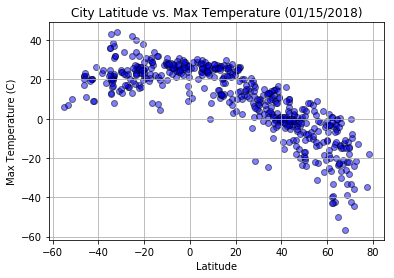

In [12]:
plt.scatter(lat, max_temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Max Temperature (01/15/2018)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.savefig("../Images/lat_vs_max_temp.png")

#### Latitude vs. Humidity Plot

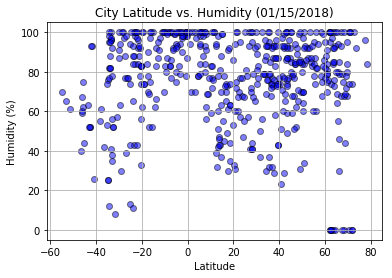

In [8]:
plt.scatter(lat, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Humidity (01/15/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../Images/lat_vs_humidity.png")

#### Latitude vs. Cloudiness Plot

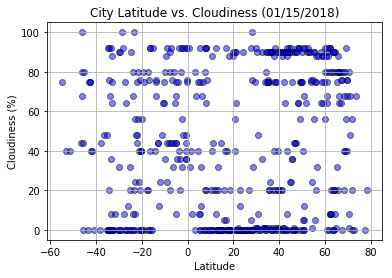

In [9]:
plt.scatter(lat, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Cloudiness (01/15/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../Images/lat_vs_cloudiness.png")

#### Latitude vs. Wind Speed Plot

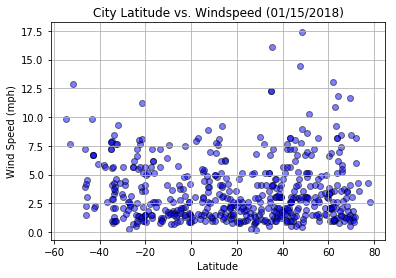

In [10]:
plt.scatter(lat, wind_speed, marker="o", facecolors="blue", edgecolors="black", alpha=0.5)
plt.title("City Latitude vs. Windspeed (01/15/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../Images/lat vs windspeed.png")